# **Load Libraries And Data**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings('ignore')

In [2]:
'''load training dataset'''
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
subdf = pd.read_csv('../input/titanic/gender_submission.csv')

**Aggregate data into a single file for easy handling in analysis and cleaning**

In [3]:
sub_df = subdf.drop(['PassengerId'],axis =1)
test_df =pd.concat([test_df,sub_df],axis = 1)
df = pd.concat([train_df,test_df],axis =0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Rearrange df colmun to get 'Survived' to end of df**

In [4]:
list(df.columns.values)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
df = df[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']]
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
df.shape

(1309, 12)

In [7]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.377387
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.484918
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


# **EDA and Visualization**

**missing values**

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64


<AxesSubplot:>

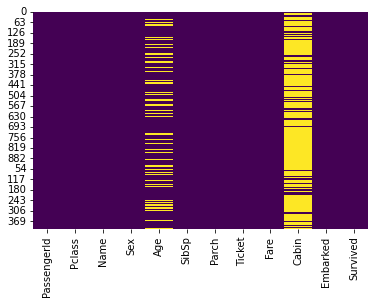

In [8]:
print(df.isnull().sum())
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

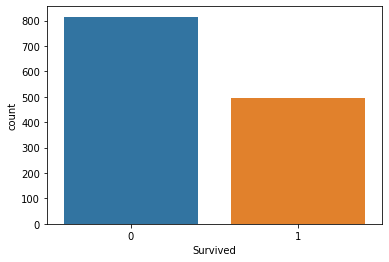

In [9]:
df['Survived'].value_counts()
sns.countplot(df['Survived'])

**Correlation between features**

<AxesSubplot:>

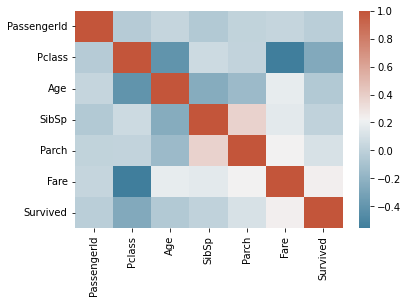

In [10]:
corr_matrix = df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(corr_matrix, annot=None ,cmap=cmap)

**largest 4 correlation with y**

In [11]:
corr_matrix.nlargest(5, 'Survived')['Survived'].index

Index(['Survived', 'Fare', 'Parch', 'SibSp', 'PassengerId'], dtype='object')

**drop smallest Correlation features, most missing values in features and less important features**

In [12]:
lis=['Cabin','Name']
df= df.drop(lis ,axis=1)
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,female,35.0,1,0,113803,53.1000,S,1
4,5,3,male,35.0,0,0,373450,8.0500,S,0


**Survival rate analysis for both sexes**

<AxesSubplot:xlabel='Survived', ylabel='count'>

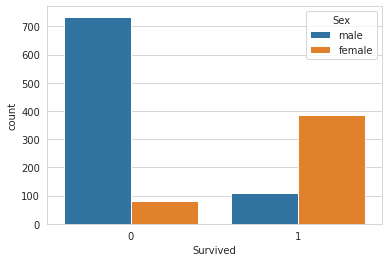

In [13]:
sns.set_style('whitegrid')
sns.countplot(x=df['Survived'],hue=df['Sex'],data=df)

**Survival rate analysis relation with Age ,Pclass ,Fare,Parch**

Age & Survived
Pclass & Survived
Fare & Survived
Parch & Survived


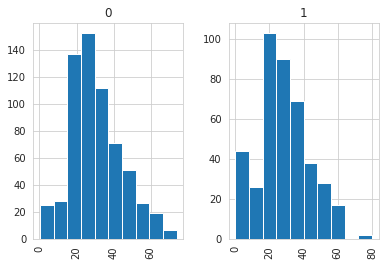

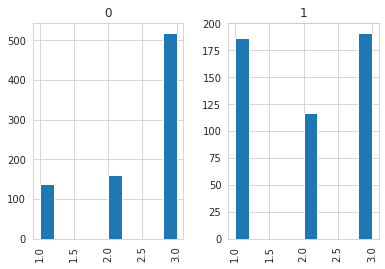

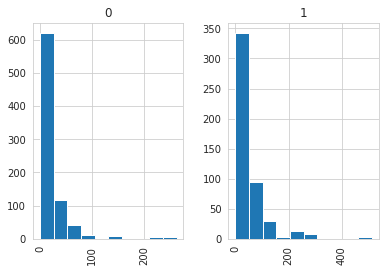

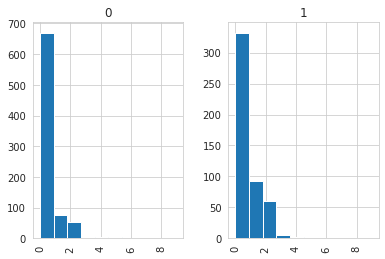

In [14]:
for i in df[['Age' ,'Pclass' ,'Fare','Parch']] :
    print(i,'&','Survived')
    df.hist(column=i, by='Survived')

# **Data cleaning**

**First ,dealing with numerics data**

In [15]:
cleaning = df.drop(['Survived'],axis = 1)
Survived = df['Survived']
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = cleaning.select_dtypes(include=numerics)
numeric_cols = numeric_cols.fillna(numeric_cols.mean())

**Then ,dealing with numerics categorical data**

In [16]:
categorical = ['object']
categorical_cols = cleaning.select_dtypes(include=categorical)
categorical_cols = categorical_cols.fillna('none')
categorical_cols = pd.get_dummies(categorical_cols )

**Regrouping the data into a single file and splitting it to pass it to the model**

In [17]:
cleaned = pd.concat([numeric_cols,categorical_cols],axis= 1)
df = pd.concat([cleaned,Survived],axis = 1)
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,...,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S,Embarked_none,Survived
0,1,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,3,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


**Test Data as Dataframe and array**

In [18]:
test_dfn = df.iloc[ 891 : ,:-1]
test_df = df.iloc[ 891 : ,:-1].values
test_dfn

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,...,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S,Embarked_none
0,892,3,34.500000,0,0,7.8292,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,893,3,47.000000,1,0,7.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,894,2,62.000000,0,0,9.6875,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,895,3,27.000000,0,0,8.6625,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,896,3,22.000000,1,1,12.2875,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,29.881138,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
414,1306,1,39.000000,0,0,108.9000,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
415,1307,3,38.500000,0,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
416,1308,3,29.881138,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
test_df

array([[8.92000000e+02, 3.00000000e+00, 3.45000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.93000000e+02, 3.00000000e+00, 4.70000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.94000000e+02, 2.00000000e+00, 6.20000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.30700000e+03, 3.00000000e+00, 3.85000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.30800000e+03, 3.00000000e+00, 2.98811377e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.30900000e+03, 3.00000000e+00, 2.98811377e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

**X ,y Split**

In [20]:
X = df.iloc[:,:-1].values
y = df['Survived'].values

# **Feature Scaling**

In [21]:
scl = MinMaxScaler(feature_range = (0, 1))
X = scl.fit_transform(X) 
test_df = scl.fit_transform(test_df) 

# **Train & Test Split**

In [22]:
X_train ,X_test ,y_train ,y_test = train_test_split(X, y , test_size = 0.3, random_state = 44)

# **Machine Learning Models**

**Logistic Regression**

In [23]:
#lgm = LogisticRegression()
#lgm = lgm.fit(X_train,y_train)
#y_tpred = lgm.predict(X_train)
#y_pred = lgm.predict(X_test)
# print('train score :',accuracy_score(y_train ,y_tpred ))
#print('test score :',accuracy_score(y_test , y_pred))
# print('con matrix :',confusion_matrix(y_test, y_pred))
#print('report :',classification_report(y_test, y_pred ))
                                                                                      # SCORE : 0.85

**Random Forest Classifier**

In [24]:
# rnc = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
# rnc = rnc.fit(X_train,y_train)
# y_tpred = rnc.predict(X_train)
# y_pred = rnc.predict(X_test)
# print('train score :',accuracy_score(y_train ,y_tpred ))
# print('test score :',accuracy_score(y_test , y_pred))
# print('con matrix :',confusion_matrix(y_test, y_pred))
# print('report :',classification_report(y_test, y_pred ))
                                                                                     # SCORE : 0.87

**Gradient Boosting Classifier**

In [25]:
# gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5,max_depth=3, random_state=140)
# gbc = gbc.fit(X_train,y_train)
# y_tpred = gbc.predict(X_train)
# y_pred = gbc.predict(X_test)
# print('train score :',accuracy_score(y_train ,y_tpred ))
# print('test score :',accuracy_score(y_test , y_pred))
# print('con matrix :',confusion_matrix(y_test, y_pred))
# print('report :',classification_report(y_test, y_pred ))
                                                                                   # SCORE : 0.85

**SVC**

In [26]:
# svc = SVC()
# svc = svc.fit(X_train,y_train)
# y_tpred = svc.predict(X_train)
# y_pred = svc.predict(X_test)
# print('train score :',accuracy_score(y_train ,y_tpred))
# print('test score :',accuracy_score(y_test , y_pred))
# print('con matrix :',confusion_matrix(y_test, y_pred))
# print('report :',classification_report(y_test, y_pred ))
                                                                                   # SCORE : 0.86

# **Voting Classifier**

In [27]:
#v1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1 , C = 0.5 , tol = 0.001)
#v2 = RandomForestClassifier(n_estimators=100, max_depth= 5,random_state=144)
#v3 = SVC()
#eclf = VotingClassifier(estimators=[('lr', v1), ('rf', v2), ('gnb', v3)],voting='hard')

#for clf, label in zip([v1, v2, v3, eclf], ['Logistic Regression', 'Random Forest', 'SVC ', 'Ensemble ']): 
 #   scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
  #  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

train score : 0.8766375545851528
test score : 0.8804071246819338
con matrix : [[229  15]
 [ 32 117]]
report :               precision    recall  f1-score   support

           0       0.88      0.94      0.91       244
           1       0.89      0.79      0.83       149

    accuracy                           0.88       393
   macro avg       0.88      0.86      0.87       393
weighted avg       0.88      0.88      0.88       393

Confusion Matrix AxesSubplot(0.125,0.125;0.62x0.755)


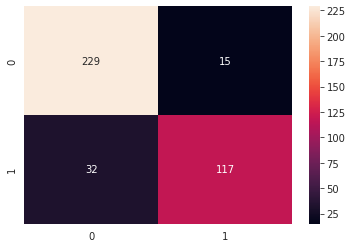

In [28]:
svc = SVC()
svc = svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
print('train score :',accuracy_score(y_train ,y_train_pred ))
print('test score :',accuracy_score(y_test , y_test_pred))
print('con matrix :',confusion_matrix(y_test, y_test_pred))
print('report :',classification_report(y_test, y_test_pred ))
con = confusion_matrix(y_test,y_test_pred)
hmap =sns.heatmap(con,annot=True,fmt="d")
print ('Confusion Matrix',hmap)

Classification Report AxesSubplot(0.125,0.125;0.62x0.755)


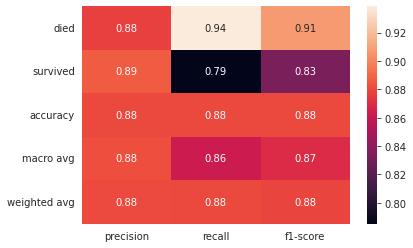

In [29]:
labels = np.arange(2)
clf_report = classification_report(y_test,y_test_pred,labels=labels,target_names=('died','survived'), output_dict=True)
hmap1 = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
print ('Classification Report',hmap1)

# **Submission**

In [30]:
y_pred = svc.predict(test_df)
submission = pd.DataFrame({ 'PassengerId': test_dfn['PassengerId'],
                            'Survived': y_pred })
submission.to_csv("submission.csv", index=False)

In [31]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
